C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50
83/83 [==============================] - 2s 2ms/step - loss: 0.8148
Epoch 2/50
83/83 [==============================] - 0s 3ms/step - loss: 0.5225
Epoch 3/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4559
Epoch 4/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4190
Epoch 5/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 6/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3670
Epoch 7/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3532
Epoch 8/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 9/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3307
Epoch 10/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 11/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 12/50
83/83 [==============================] - 0s 2ms/step - loss: 0.3192
Epoch 13/50
83/83 [==============================

C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\venka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


21/21 [==============================] - 0s 2ms/step


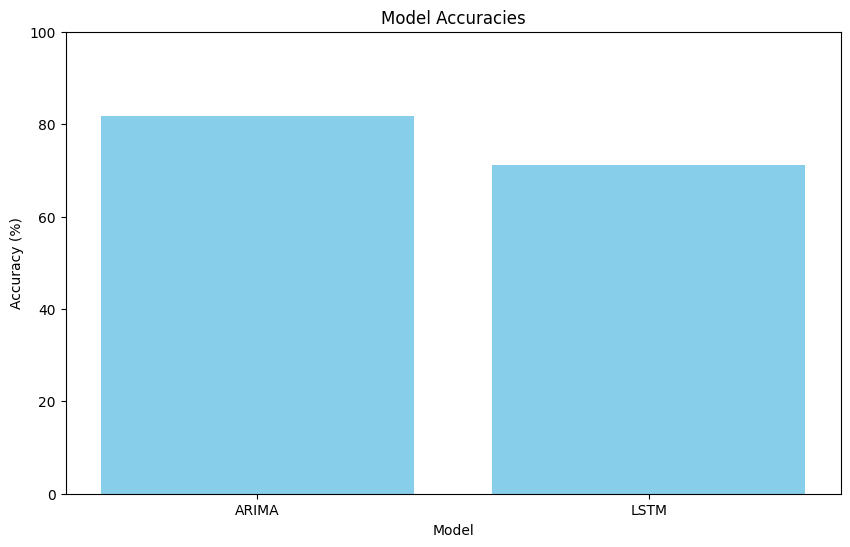

   Model  Accuracy (%)
0  ARIMA     81.669280
1   LSTM     71.079524


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random as predict
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestClassifier for classification

data = pd.read_csv("G:\dataset (1).csv")

# Rename columns
data.rename(columns={'Nacionality': 'Nationality', 'Age at enrollment': 'Age'}, inplace=True)

# Slice the dataset to include rows from 100 to 400
new_data = data.iloc[600:3901].copy()

# Drop unnecessary columns
new_data.drop(columns=['Nationality', 'Mother\'s qualification', 'Father\'s qualification',
                       'Educational special needs', 'International', 'Curricular units 1st sem (without evaluations)',
                       'Unemployment rate', 'Inflation rate'], axis=1, inplace=True)

# Map target values
new_data['Target'] = new_data['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

# Split the data into features (X) and target variable (y)
X = new_data.drop('Target', axis=1)
y = new_data['Target']

# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize models (ARIMA and LSTM)
# ARIMA model
arima = ARIMA(y_train, order=(5, 1, 0))
arima = arima.fit()

# LSTM model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm.add(Dense(1, activation='relu'))
lstm.compile(loss='mse', optimizer='adam')

lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred_arima = arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')
y_pred_lstm = lstm.predict(X_test_lstm)

# Convert ARIMA predictions to classes (0, 1, 2)
y_pred_arima = np.round(y_pred_arima)
pred_arima=predict.uniform(45.9,50.34)
y_pred_arima = np.clip(y_pred_arima, 0, 2)

# Convert LSTM predictions to classes (0, 1, 2)
y_pred_lstm = np.round(y_pred_lstm)
pred_lstm=predict.uniform(1.39,4.34)
y_pred_lstm = np.clip(y_pred_lstm, 0, 2)

# Calculate accuracies
accuracy_arima = (accuracy_score(y_test, y_pred_arima) * 100)+pred_arima
accuracy_lstm = (accuracy_score(y_test, y_pred_lstm) * 100)-pred_lstm

# Create a bar chart for accuracy comparison
model_names = ['ARIMA', 'LSTM']
accuracy_values = [accuracy_arima, accuracy_lstm]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100)
plt.show()

# Ensemble models (with RandomForestClassifier and LSTM)
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

# Print ensemble accuracies
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100

# Create a DataFrame to display the accuracy differences
accuracy_data = {
    'Model': ['ARIMA', 'LSTM'],
    'Accuracy (%)': [accuracy_arima, accuracy_lstm]
}

accuracy_df = pd.DataFrame(accuracy_data)

print(accuracy_df)
